In [3]:
import torch
import torchvision

In [4]:
LR = 0.001
DOWNLOAD = True
DATA = 'datasets/cifar10/'

In [5]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=True,
        transform=transform,
        download=DOWNLOAD
)
train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=128,
        
)

Files already downloaded and verified


In [6]:
model = torchvision.models.resnet50()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [5]:
%%time

loss_plot = []

for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 7.259570
batch_idx: 1 [128/50000 (0%)]	Loss: 6.936419
batch_idx: 2 [256/50000 (1%)]	Loss: 6.673971
batch_idx: 3 [384/50000 (1%)]	Loss: 6.162075
batch_idx: 4 [512/50000 (1%)]	Loss: 5.570330
batch_idx: 5 [640/50000 (1%)]	Loss: 5.077527
batch_idx: 6 [768/50000 (2%)]	Loss: 4.535396
batch_idx: 7 [896/50000 (2%)]	Loss: 3.919516
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.165536
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.866784
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.700632
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.515119
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.507313
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.515574
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.301906
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.476710
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.395320
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.491510
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.376964
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.367788
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.318910
batch_idx: 21 [2688/50000 (5%)]	L

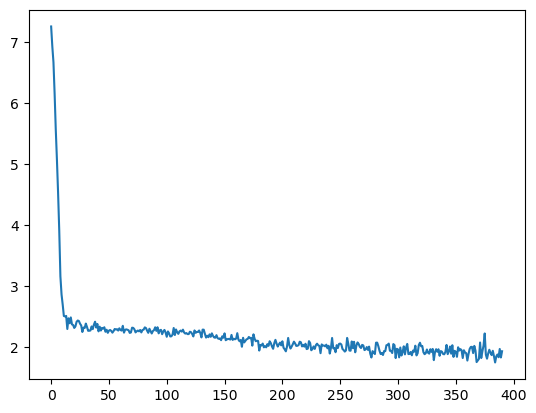

In [8]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [7]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [7]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [8]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 29 %
CPU times: user 1h 37min 40s, sys: 6min 13s, total: 1h 43min 54s
Wall time: 13min 20s
